In [1]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fitness_mcmc import *
import data_io as io 
import arviz as az

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [13]:
"""
Loading data and looking at the first 40 ordered genotypes. 
"""

data, time, ordered_frequencies  = io.load_data('filtered_counts_ypd_temp_30.txt')
fitness_model = Fitness_Model(ordered_frequencies[0:40],time)
fitness_model.find_MAP()

[5, 10, 25, 40, 45]


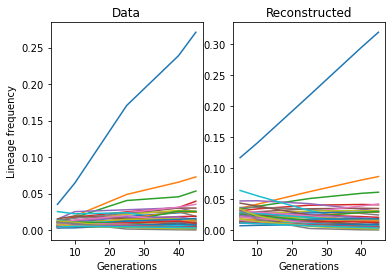

In [14]:
fitness_model.plot_MAP_estimate(type = "lin")

prior: $$s \sim \text{flat}('fitnesses') $$
likelihood: $$f \sim \text{poisson}(\lambda)$$
where $$\lambda_i \sim \frac {f0_i * exp(s_i * t)} {\sum_{i} f0_i * exp(s_i * t)}$$
posterior: $$p(s \mid D,M,I) \propto p(s \mid M,I)p(D\mid M,I,s)$$

In [ ]:
#simulated data 
N = 10
num_gens = 49
f0_vals = np.random.random(N)
s_vals = np.random.random(N) / 10

times = np.array([5, 10, 25, 40, 45])

traj = create_trajectories(f0_vals, s_vals, times)
# The reference trajectory should be the one we know most about (have the most counts for)
# The reference trajectory should be indexed first in the data array
idx = np.flipud(np.argsort(np.sum(traj, axis = 1)))
traj = traj[idx, :]

In [15]:
fitness_model.mcmc_sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [f0, s]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 36 seconds.
The acceptance probability does not match the target. It is 0.9038743918230296, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/pavelzhelnin/anaconda3/envs/phys201/lib/python3.9/site-packages/arviz/plots/plot_utils.py:490: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (78) in plot_posterior, generating only 40 plots
  warnings.warn(


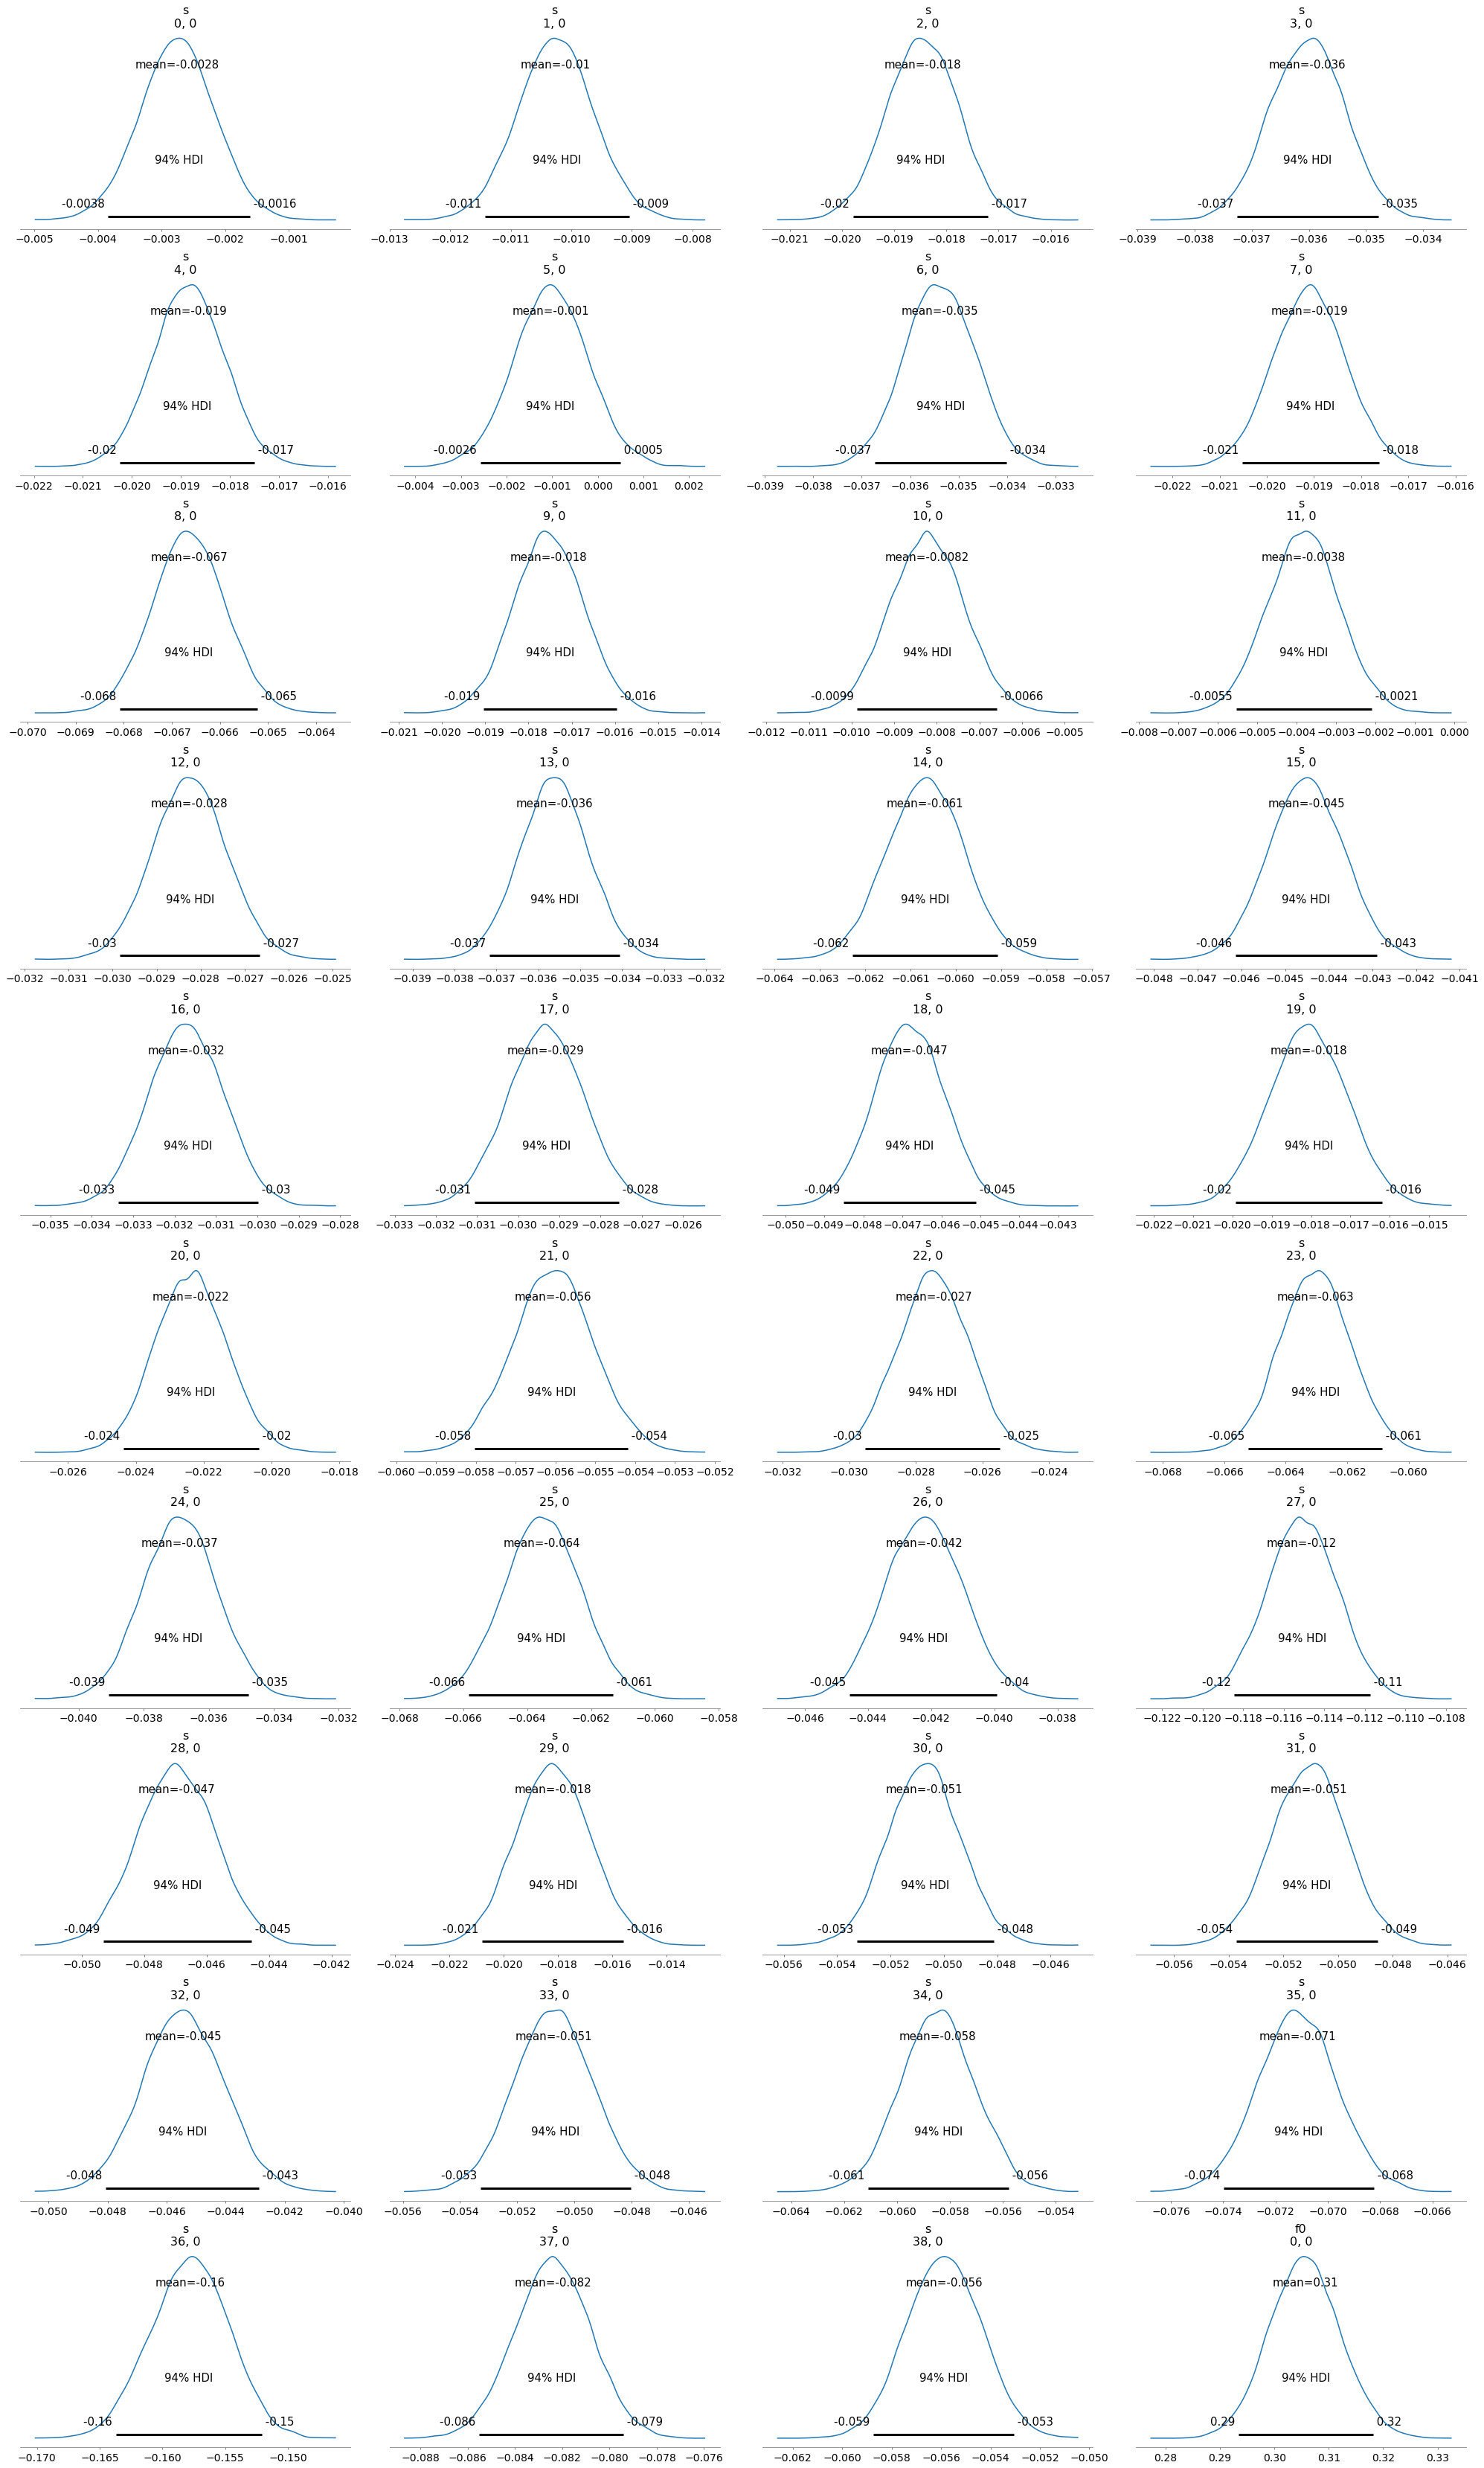

In [17]:
fitness_model.plot_mcmc_posterior()